# Job Satisfaction — Analyzing Employee Exit Surveys
***

In this project, we are going to analyze two employee exit surveys done by the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia.

These two datasets contain information about employees and their reasons for resignation. The datasets can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) from TAFE and [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) from DETE.

We will combine both surveys and answer the following questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older
employees?

## Results
***

After the data analysis, we found out that younger and less experienced employees are more satisfied with their jobs. 

## Prerequisites
***

For this project we will be using four Python packages:
* NumPy.
* pandas.
* Matplotlib.
* Seaborn.

## Data Exploration
***

Now we are ready to start. First of all, let's open the datasets and make some initial observations.

In [1]:
# Import necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the datasets
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")

# Disable columns truncation
pd.options.display.max_columns = 75 

# Disable warnings: there are no critical ones
import warnings
warnings.filterwarnings('ignore')

### Columns Information

We will look at general information about each column.

In [2]:
# DETE survey
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
# TAFE survey
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

Both datasets contain information about reasons for resignation but need to be combined and cleaned for further analysis.

Here is what has to be done:

1. We have to decide which factors can be considered dissatisfaction and combine them in one column.
2. Create a column with years of working in the DETE survey. The corresponding column in the TAFE survey is `LengthofServiceOverall. Overall Length of Service at Institute (in years)`.
3. We have to clean the age columns in order to split the employees into different generational groups.
4. In the DETE survey there some `Not Stated` values that are actually missing data, so it is necesary to change them to `NaN` values.

It is also useful to notice that we do not need all columns to answer our questions. We only need the columns that contain information about reasons for resignation, years of service and age.

Let's now look at the unique values of `SeparationType` in the DETE survey and of `Reason for ceasing employment` in the TAFE survey to see if there are any similarities.

In [4]:
# DETE survey
dete_survey["SeparationType"].unique()

array(['Ill Health Retirement', 'Voluntary Early Retirement (VER)',
       'Resignation-Other reasons', 'Age Retirement',
       'Resignation-Other employer',
       'Resignation-Move overseas/interstate', 'Other',
       'Contract Expired', 'Termination'], dtype=object)

In [5]:
# TAFE survey
tafe_survey["Reason for ceasing employment"].unique()

array(['Contract Expired', 'Retirement', 'Resignation',
       'Retrenchment/ Redundancy', 'Termination', 'Transfer', nan],
      dtype=object)

To answer the initial questions we are only interested in the resignation reason, but there are three different type of resignation in the DETE survey:
* Other reasons.
* Other employer.
* Move overseas/interstate.

We will need to combine them in one column for a further analysis.

### Missing Data

Now let's look at the null values in both dataframes.

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In the DETE survey there are some `NaN` values in the columns of our interest: `DETE Start Date`, `Cease Date` and `Age`.

In [7]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In case of TAFE survey there is a pattern of 265 missing values in `Contirubuting Factors`. There are also 106 missing values in the `CurrentAge. Current Age` column.

Let's have a look at the unique values in the `DETE Start Date` and `Cease Date` columns.

In [8]:
dete_survey["DETE Start Date"].unique()

array([1984.,   nan, 2011., 2005., 1970., 1994., 1972., 1988., 2009.,
       1997., 1999., 1998., 1967., 2007., 1995., 1996., 2006., 1989.,
       1982., 1980., 1973., 1981., 1974., 1975., 1978., 2003., 2000.,
       1977., 1976., 1985., 2008., 1963., 1993., 1979., 1990., 1969.,
       1966., 2010., 1968., 1991., 1971., 2002., 1986., 2004., 2012.,
       1983., 2001., 1987., 1992., 2013., 1965.])

In [9]:
dete_survey["Cease Date"].unique()

array(['08/2012', '05/2012', '07/2012', '2012', '2013', '2014', '2010',
       '09/2013', '07/2013', '08/2013', '06/2013', '04/2013', '05/2013',
       '09/2010', '01/2014', '11/2012', '04/2014', '12/2013', '07/2014',
       '10/2013', '11/2013', nan, '09/2014', '07/2006', '02/2014'],
      dtype=object)

In both columns there was `Not Stated` value that we transformed in `NaN` value when reading in the datasets.

Now let's turn our attention to the `LengthofServiceOverall. Overall Length of Service at Institute (in years)` column in the TAFE survey and see if it has the same problem.

In [10]:
tafe_survey["LengthofServiceOverall. Overall Length of Service at Institute (in years)"].unique()

array(['1-2', nan, '3-4', '7-10', 'Less than 1 year', '11-20', '5-6',
       'More than 20 years'], dtype=object)

Perfect! All missing data are actual `NaN` values.

It is also important to notice that there are different reasons of `Job Dissatisfaction` in the DETE survey like `Lack of Recognition` or `Work Location`, so they might be unified to a more general category of dissatisfaction.

Let now look at the `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns in the TAFE survey to see if there is any missing data.

In [11]:
tafe_survey["Contributing Factors. Dissatisfaction"].unique()

array([nan, '-', 'Contributing Factors. Dissatisfaction '], dtype=object)

In [12]:
tafe_survey["Contributing Factors. Job Dissatisfaction"].unique()

array([nan, '-', 'Job Dissatisfaction'], dtype=object)

That is interesting! We will have to decide how to handle these hyphens.

## Data Cleaning
***

Now let's clean the datasets. We will have to accomplish these tasks:

* Remove unnecessary columns.
* Rename the columns to make them more readable and standartize them in both datasets.
* Select only the data we need.
* Check for any logical inconsistencies.
* Create new columns.
* Decide how to categorize the data of our interest.

### Removing Unnecessary Columns

First of all, we will remove all the columns we do not need in our analysis.

In [13]:
# DETE survey: drop columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

# TAFE survey: drop columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [14]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From both datasets we have removed employees' opinions about their workplace because all we need is general information about them and reasons for resignation.

### Renaming Columns

A lot of columns in both datasets have names with identical meaning, but named differently. We will eventually combine both datasets, so it is essential to standardize the columns' names.

In [16]:
# Rename the DETE survey columns
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(" ", "_").str.strip()
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [17]:
# Rename the TAFE survey columns
new_names = {
    "Record ID": "id",
    "CESSATION YEAR": "cease_date",
    "Reason for ceasing employment": "separationtype",
    "Gender. What is your Gender?": "gender",
    "CurrentAge. Current Age": "age",
    "Employment Type. Employment Type": "employment_status",
    "Classification. Classification": "position",
    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
    "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"   
}
tafe_survey_updated = tafe_survey_updated.rename(new_names, axis=1)
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Selecting Resignation Reason

Let's use the `Series.value_counts()` method to look at the unique values in the `separationtype` columns in both datasets.

In [18]:
# DETE separation types
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
# TAFE separation types
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

We will use only the `Resignation` reason to analyze the data, so let's choose only the rows that have `Resignation` separation type. We can accomplish it by using regular expressions and the pandas `Series.str.contains()` method.

We have one `NaN` value in the `separationtype` column in the TAFE survey that we will have to remove.

In [20]:
# Retrieve resignation data from DETE survey
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(r"Resignation")].copy()

# Check if the data is correct
dete_resignations["separationtype"].value_counts(dropna=False)

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [21]:
# Retrieve resignation data from TAFE survey
tafe_survey_updated = tafe_survey_updated[tafe_survey_updated["separationtype"].notna()].copy() # Drop NaN values
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains("Resignation")]

# Check if the data is correct
tafe_resignations["separationtype"].value_counts(dropna=False)

Resignation    340
Name: separationtype, dtype: int64

### Checking for Illogical Data

It is very important to check if our data makes sense and to remove all logical inconsistencies.

First of all, let's have a look at the `cease_date` columns in the DETE survye. It contains dates where employees started and finished work so if a date is after July 2019 (the most recent dataset update) it makes no sense and we have to remove these rows.

In [22]:
# Unique values in the cease_date column
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

All the dates seem reasonable. Now we will extract only the years and assign them back to the `cease_date` column.

In [23]:
# Extract the year and convert it to float type
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"] = dete_resignations["cease_date"].astype(float)

# Check if the data is correct
dete_resignations["cease_date"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

Everything seems to work as expected. Now let's look at the `dete_start_date` column in the DETE survey and at the `cease_date` column in the TAFE survey to see if there is something strange in the data.

In [24]:
dete_resignations["dete_start_date"].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

It is unlikely that the `dete_start_date` was before 1940 since these people would have roughly a hundred years (assuming they start their work in their 20s). Looking at the data everything is fine. But let's use the `Series.sort_index()` method to sort the values in ascending order to ensure that there are no anomalies.

In [25]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

Let's plot a box plot of the `dete_state_date` column in the DETE survey to see if there are any outliers.

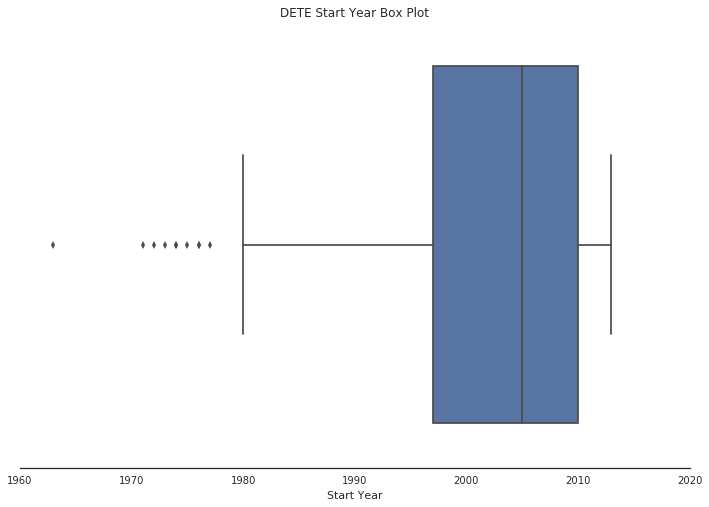

In [26]:
# Plot
plt.figure(figsize=(12, 8))
sns.set_style("white")
box_plot = sns.boxplot(dete_resignations["dete_start_date"])

# Plot aesthetics
plt.title("DETE Start Year Box Plot")
plt.xlabel("Start Year")
plt.xlim(1960, 2020)

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

Only 1963 is an outlier, that we can exclude it from the further analysis.

In [27]:
dete_resignations = dete_resignations[~(dete_resignations["dete_start_date"] == 1963.0)]

Now let's check the `cease_date` column in the TAFE survey.

In [28]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

Also in the TAFE survey there is nothing strange in the `cease_date` column. Only the number of years in both dataframes is different but it should not cause any problem.

### Creating New Columns

We are on our way to start answering our questions. Now let's create some new columns to facilitate our further analysis.

One of our questions is:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In order to answer this question we need to calculate the period an employee was in service. In the TAFE survey we already have the column called `institute_service` that contains years of service at a company. In order to combine the datasets, we need to create a corresponding column in the DETE survey. We can do this by subtracting `dete_start_date` from `cease_date`.

In [29]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations[["cease_date", "dete_start_date", "institute_service"]].head()

,cease_date,dete_start_date,institute_service
3,2012.0,2005.0,7.0
5,2012.0,1994.0,18.0
8,2012.0,2009.0,3.0
9,2012.0,1997.0,15.0
11,2012.0,2009.0,3.0


One of our questions is to verify if employees resign because of some kind of dissatisfaction. In both datasets we may identify columns that describe dissatisfaction.

For DETE Survey:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

For TAFE Survey:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

In the TAFE survye we will convert all values in both columns in either `True`, `False` or `NaN`. We will use `DataFrame.any()` method to create a new column called `dissatisfied` and to fill it with `True`, `False` or `NaN` based on the values in `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction`. 

This approach will combine information from both columns and simplify our analysis.

Let's look at the values in both columns.

In [30]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [31]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

We will create a function that does the following:
* If the value is `NaN`, return `np.nan`.
* If the value is `"-"`, return `False`. Since there are already some missing values, we can't treat hyphens as `NaN` values.
* For other values, return `True`.

In [32]:
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

We now apply this function to both columns using the `DataFrame.applymap()` method.

In [33]:
tafe_resignations_up = tafe_resignations.copy() # Create a copy to avoid the SettingwithCopy warning
tafe_resignations_up["Contributing Factors. Dissatisfaction"] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [34]:
# Use any method
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[[
    "Contributing Factors. Dissatisfaction",
    "Contributing Factors. Job Dissatisfaction"
]].any(axis=1, skipna=False)

# Check if the data is correct
tafe_resignations_up["dissatisfied"].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

Recall that all columns in `dete_survey_updated` that interest us have the `bool` type so we can directly apply `DataFrame.any()` method. We will create a new column called `dissatisfied` to be able to combine both datasets.

In [35]:
# Apply any() method
dete_resignations["dissatisfied"] = dete_resignations[[
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]].any(axis=1, skipna=False)

# Create a copy to avoid the SettingwithCopy warning
dete_resignations_up = dete_resignations.copy()

# Check if the data is correct
dete_resignations_up["dissatisfied"].value_counts(dropna=False)

False    161
True     149
Name: dissatisfied, dtype: int64

### Combining the Datasets

Now we are ready to combine our datasets in order to start answering the questions.

We will first add a column with institute name to each dataset in order to distinguish them after combining.

In [36]:
# Add institute column to the DETE survey
dete_resignations_up["institute"] = "DETE"

# Add institute column to the TAFE survey
tafe_resignations_up["institute"] = "TAFE"

Before we combine the datasets, let's choose only the columns that exist in both datasets to have a cleaner dataframe.

In [37]:
# DETE columns
dete_resignations_up.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service', 'dissatisfied',
       'institute'],
      dtype='object')

In [38]:
# TAFE columns
tafe_resignations_up.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute'],
      dtype='object')

In [39]:
# Select the same columns in both datasets
same_cols = ["id", "separationtype", "cease_date", 
             "position", "employment_status","institute_service",
             "dissatisfied", "institute", "gender", "age"]
dete_resignations_up = dete_resignations_up[same_cols]
tafe_resignations_up = tafe_resignations_up[same_cols]

# Combine the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
id                   650 non-null float64
separationtype       650 non-null object
cease_date           634 non-null float64
position             597 non-null object
employment_status    596 non-null object
institute_service    562 non-null object
dissatisfied         642 non-null object
institute            650 non-null object
gender               591 non-null object
age                  595 non-null object
dtypes: float64(2), object(8)
memory usage: 50.9+ KB


In [40]:
# Count not null values
combined.notnull().sum().sort_values()

institute_service    562
gender               591
age                  595
employment_status    596
position             597
cease_date           634
dissatisfied         642
id                   650
separationtype       650
institute            650
dtype: int64

In [41]:
combined.head()

,id,separationtype,cease_date,position,employment_status,institute_service,dissatisfied,institute,gender,age
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,7,False,DETE,Female,36-40
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,18,True,DETE,Female,41-45
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,3,False,DETE,Female,31-35
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,15,True,DETE,Female,46-50
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,3,False,DETE,Male,31-35


### Some More Data Cleaning

Recall one of our questions:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

To answer it we need information from the `institute_service` column. Let's have a look at it.

In [42]:
combined["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
23.0                   4
11.0                   4
24.0                   4
39.0                   3
32.0                   3
21.0                   3
19.0                   3
28.0                   2
26.0                   2
25.0                   2
36.0                   2
30.0                   2


It contains a lot of quite confusing data. We will create a functions splits it into four categories following these criteria:

* **New**: Less than 3 years at a company
* **Experienced**: 3-6 years at a company
* **Established**: 7-10 years at a company
* **Veteran**: 11 or more years at a company

These are slightly modified categories from an [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage) on businesswire.com, that consider years of employees' experience rather than their age.

In [43]:
# Extract the years of service and convert them to float type
combined["institute_service_up"] = combined['institute_service'].astype('str').str.extract(r'(\d+)')
combined["institute_service_up"] = combined['institute_service_up'].astype(float)

# Check if the data is correct
combined["institute_service_up"].value_counts(dropna=False).sort_index()

 0.0      20
 1.0     159
 2.0      14
 3.0      83
 4.0      16
 5.0      56
 6.0      17
 7.0      34
 8.0       8
 9.0      14
 10.0      6
 11.0     30
 12.0      6
 13.0      8
 14.0      6
 15.0      7
 16.0      5
 17.0      6
 18.0      5
 19.0      3
 20.0     17
 21.0      3
 22.0      6
 23.0      4
 24.0      4
 25.0      2
 26.0      2
 27.0      1
 28.0      2
 29.0      1
 30.0      2
 31.0      1
 32.0      3
 33.0      1
 34.0      1
 35.0      1
 36.0      2
 38.0      1
 39.0      3
 41.0      1
 42.0      1
NaN       88
Name: institute_service_up, dtype: int64

Now we will write a function that splits values into the categories we defined above.

In [44]:
# Function to split the data into service categories
def service_cats(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return "New"
    elif val >= 3 and val < 7:
        return "Experienced"
    elif val >= 7 and val < 11:
        return "Established"
    else:
        return "Veteran"

# Apply the function to the institute_service_up column
combined["service_cat"] = combined["institute_service_up"].apply(service_cats)

# Check if the data is correct
combined["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        135
NaN             88
Established     62
Name: service_cat, dtype: int64

## Data Analysis
***

Now we are ready to aggregate our data and start an analysis and answer the questions.

Let's first confirm the number of `True`, `False` and `NaN` values in the `dissatisfied` column.

In [45]:
combined["dissatisfied"].value_counts(dropna=False)

False    402
True     240
NaN        8
Name: dissatisfied, dtype: int64

We have 8 `NaN` values that we will fill with `False` values since it is the most frequent value.

In [46]:
# Fill NaN values with False
combined["dissatisfied"] = combined["dissatisfied"].fillna(False)

# Check if the data is correct
combined["dissatisfied"].value_counts(dropna=False)

False    410
True     240
Name: dissatisfied, dtype: int64

### Job Dissatisfaction by Service Category

Our first question is:
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

We will now use pivot tables to aggregate the data and calculate percentage of dissatisfied employees in each category of the `service_cat` group. Then we will visualize the findings with a bar plot. We will also write a function to annotate all our future bar plots.

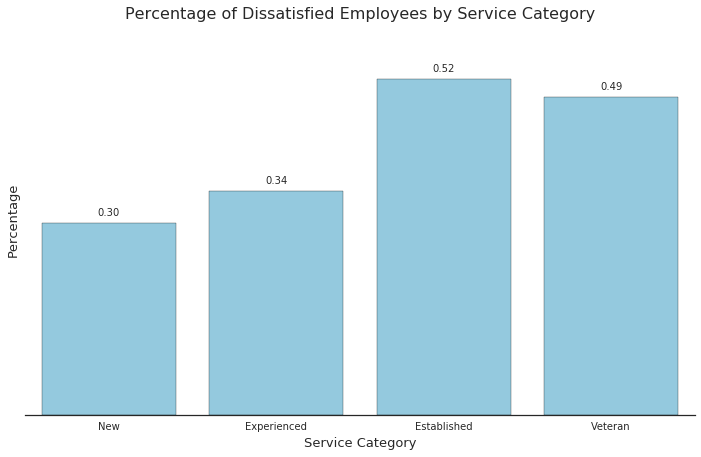

In [47]:
# Pivot table: dissatisfed by service category
pv_dissatisfied_service = combined.pivot_table(
    values="dissatisfied",
    index="service_cat"
)

# Reorder the service categories
serv_order = ["New", "Experienced", "Established", "Veteran"]
pv_dissatisfied_service = pv_dissatisfied_service.reindex(serv_order)

# Reset the pivot table indexes
pv_dissatisfied_service.reset_index(inplace=True)

# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("white")

plt_serv = sns.barplot(
    x="service_cat",
    y="dissatisfied",
    data=pv_dissatisfied_service,
    color="skyblue"
)

# Improve the plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Service Category", fontsize=16)
plt.xlabel("Service Category", fontsize=13)
plt.ylabel("Percentage", fontsize=13)
plt.yticks([])

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Function for plot annotation
def annotate(plot, rd=".2f"):
    for p in plot.patches:
            plot.annotate(format(p.get_height(), rd), 
                   (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha = "center", 
                    va = "center", xytext = (0, 10), 
                    textcoords = "offset points"
                  )
            
# Annotate the plot
annotate(plt_serv)

It is clear that employees with more than 7 years of service are more likely to resign due to some kind of dissatisfaction.

### Job Dissatisfaction by Generation

Our second question is:
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In order to answer this question we have to:
1. Clean the `age` column.
2. Split the data into generational groups.
3. Group by the generational groups and plot the results.

Let's start by looking at the `age` column.

In [48]:
combined["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      22
20 or younger    10
Name: age, dtype: int64

We will group the ages according to the generational groups from [this site](https://www.kasasa.com/articles/generations/gen-x-gen-y-gen-z). Both datasets were updated in 2019, so we will have to take it into consideration.

We will extract only the first ages in case there is a range of them.

In [49]:
# Extract the first age and convert it to float type
combined["age_up"] = combined["age"].str.extract(r"(\d+)")
combined["age_up"] = combined["age_up"].astype(float)

# Check if the data is correct
combined["age_up"].value_counts(dropna=False).sort_index()

 20.0    10
 21.0    62
 26.0    67
 31.0    61
 36.0    73
 41.0    93
 46.0    81
 51.0    71
 56.0    55
 61.0    22
NaN      55
Name: age_up, dtype: int64

Everything seems to be fine. Now we will declare a function splits the data into generational groups following these criteria:

* **Baby Boomers**: 55 and older.
* **Gen X**: 40-54 years.
* **Millennials**: 25-39 years.
* **Gen Z**: 24 and younger.

In [50]:
# Function to split ages into generational groups
def age_cats(age):
    if pd.isnull(age):
        return np.nan
    elif age <= 24:
        return "Gen Z"
    elif age > 24 and age <= 39:
        return "Millennials"
    elif age > 39 and age <= 54:
        return "Gen X"
    else:
        return "Baby Boomers"
    
# Apply the function to the age_cat column
combined["age_cat"] = combined["age_up"].apply(age_cats)

# Check if the data is correct
combined["age_cat"].value_counts(dropna=False)

Gen X           245
Millennials     201
Baby Boomers     77
Gen Z            72
NaN              55
Name: age_cat, dtype: int64

Now we can group the generational groups and the percentage of dissatisfied employees in each generation, using a pivot table.

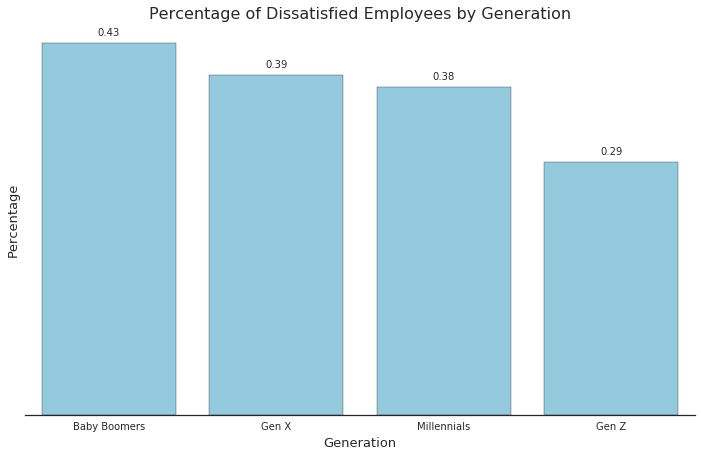

In [51]:
# Pivot table: dissatisfied by generation
pv_dissatisfied_age = combined.pivot_table(
    values="dissatisfied",
    index="age_cat"
)

# Reoder the generational groups
gen_order = ["Baby Boomers", "Gen X", "Millennials", "Gen Z"]
pv_dissatisfied_age = pv_dissatisfied_age.reindex(gen_order)

# Reset the pivot table indexes
pv_dissatisfied_age.reset_index(inplace=True)

# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("white")

plt_age = sns.barplot(
    x="age_cat",
    y="dissatisfied",
    data=pv_dissatisfied_age,
    color="skyblue"
)

# Improve the plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Generation", fontsize=16)
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Percentage", fontsize=13)
plt.yticks([])

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Annotate the plot
annotate(plt_age)

The Gen Z born after 1995 is the most satisfied one by a large margin, even though you may find a lot of information on the Web, that Millennials and Gen Z are generations that are least satisfied with their jobs (ex. [here](https://www.theladders.com/career-advice/millennial-and-gen-z-workers-have-low-job-satisfaction-and-really-want-rewards-and-prizes)). This may indicate that they were not very honest while answering the surveys or there was some error in sampling. 

### Dissatisfaction by Service Category and Generation

Let's now combine the data from service categories and generational groups to see if there is something interesting about it. We have to be aware though that may cause some biases since it is unlikely that Gen Z falls in Established or Veteran service categories.

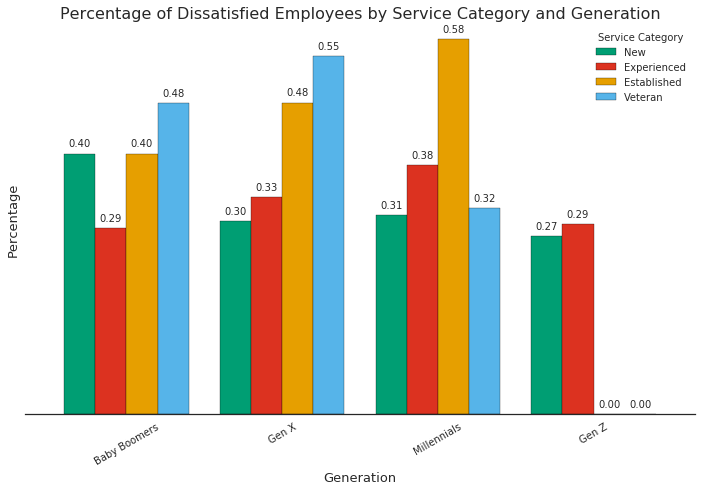

In [52]:
# Pivot table: dissatisfied by service category and generation
pv_dis_serv_age = combined.pivot_table(
    values="dissatisfied",
    index="age_cat",
    columns="service_cat",
    fill_value=0
)

# Reindex
pv_dis_serv_age = pv_dis_serv_age.reindex(gen_order)

# Reorder the columns
pv_dis_serv_age = pv_dis_serv_age[serv_order]

# Colorblind-friendly colors
colors = [[0,158/255,115/255], [220/255,50/255,32/255], [230/255,159/255,0], [86/255,180/255,233/255]]
         
# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("white")

plt_serv_age = pv_dis_serv_age.plot(kind="bar", 
                         figsize=(12,7), 
                         rot=30, 
                         width=0.8,
                         color=colors
)

# Improve the plot aesthetics
plt.title("Percentage of Dissatisfied Employees by Service Category and Generation", fontsize=16)
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Percentage", fontsize=13)
plt.yticks([])
plt.legend(title="Service Category", fontsize="medium")

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Annotate the plot
annotate(plt_serv_age)

It is clear that most veterans of Baby Boomers and Gen X are less satisfied groups of employees, whereas between Millennials the situation is opposite. It was also confirmed that Gen Z is the most satisfied generation independently of their experience.

## Checking Data Reliability
***

It is utterly important to check if our data is reliable. In order to do so let's check if our groups are big enough to be a representative sample . It is generally accepted that a sample should have at least 30 individuums/objects to provide robust statistics.

We already know that each service category and generational group has enough employees. Now we need to check each group that combines both service category and generational group (ex. Baby Boomers veterans) one by one.

In [53]:
# Pivot table: dimension of each group
pv_bias = combined.pivot_table(
    values="dissatisfied",
    index="age_cat",
    columns="service_cat",
    fill_value=0,
    aggfunc=lambda x: len(x)
)

# Reindex
pv_bias = pv_bias.reindex(gen_order)

# Reorder the columns
pv_bias = pv_bias[serv_order]

# Show the pivot table
pv_bias

service_cat,New,Experienced,Established,Veteran
age_cat,,,,
Baby Boomers,5,14,5,44
Gen X,71,66,23,71
Millennials,72,68,33,19
Gen Z,44,24,1,0


At first glance there are some groups that are too small to provide reliable data. Let's visualize the numbers to have a better overview.

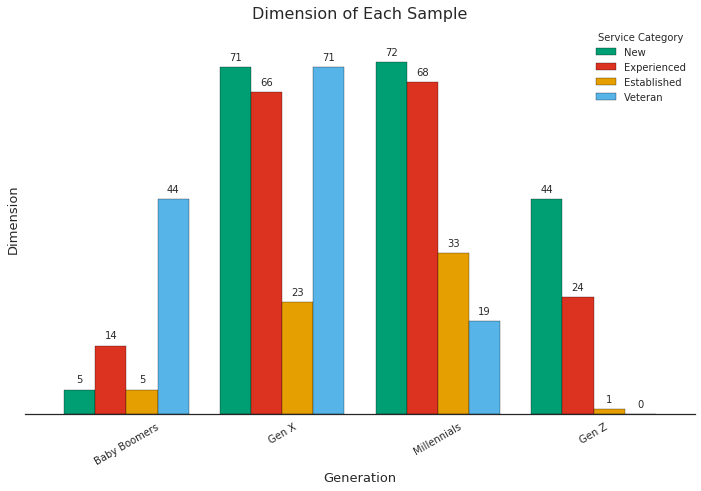

In [54]:
# Bar plot of the pivot table
plt.figure(figsize=(12,7))
sns.set_style("white")

plt_bias = pv_bias.plot(
    kind="bar", 
    figsize=(12,7), 
    rot=30, 
    width=0.8,
    color=colors
)

# Improve the plot aesthetics
plt.title("Dimension of Each Sample", fontsize=16)
plt.xlabel("Generation", fontsize=13)
plt.ylabel("Dimension", fontsize=13)
plt.yticks([])
plt.legend(title="Service Category", fontsize="medium")

# Remove the spines
for loc in ["top", "left", "right"]:
    plt.gca().spines[loc].set_visible(False)

# Annotate the plot
annotate(plt_bias, rd=".0f")

plt.savefig("barplot.png")

It is crystal clear now that only the following groups can provide robust statistics:
* New from Gen X, Millennials and Gen Z.
* Experienced from Gen X and Millennials.
* Established from Millennials.
* Veterans from Baby Boomers and Gen X.

## Conclusions

In this project, we analyzed two exit surveys done by the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We have answered two questions:

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


We now know that the most experienced employees are least satisfied with their jobs. We also know that Baby Boomers followed (by a small margin) by Gen X and Millennials are not happy with their jobs, whereas Gen Z seems to be a lot more satisfied generation.

In the end, we combined both service categories and generational groups. Few groups of the combination could provide us robust statistics. 

We conclude that:
* New employees on average are more satisfied than more experienced employees in the Gen X and Millennials generations.
* Baby Boomers veterans are less satisfied with their jobs than Gen X veterans. 
* In Gen X, veterans are far more dissatisfied than new and experienced employees.

All being said, that means that younger and less experienced employees are more satisfied with their jobs.